<a href="https://colab.research.google.com/github/MananDesai2997/MananDesai2997/blob/main/RexolitePlate_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

# Importing the libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [32]:
import io
from google.colab import files

In [33]:
uploaded = files.upload()

Saving CLASSIFICATION.csv to CLASSIFICATION (1).csv


In [34]:
dataset = pd.read_csv(io.BytesIO(uploaded['CLASSIFICATION.csv']))

In [35]:
dataset

,Sequence_Number,Job_Changeover_Proximity,Revision_Group,Week_Number,Suspicious_Unit,SH1_C2_Diameter -14.020,SH1_B5_Diameter -0.220_1,SH1_B5_Diameter -0.220_2,SH1_B5_Diameter -0.160_1,SH1_B5_Diameter -0.160_2,...,SH2_A8_Diameter -0.650_1,SH2_A8_Diameter -0.650_2,SH2_A8_Diameter -0.650_3,SH2_A8_True Position -0.003_1,SH2_A8_True Position -0.003_2,SH2_A8_True Position -0.003_3,SH5 A8_SURFACE FINISH_1,SH5 A4_SURFACE FINISH_2,SH1 B5_DEPTH .100,RCAI_Defect
0,1,0.00000,1,1,1,14.01740,0.22220,0.22240,0.16120,0.16130,...,0.65180,0.65180,0.65180,0.00060,0.00120,0.00120,7.00,7.00,0.101,1
1,2,0.00000,1,2,1,14.01601,0.22146,0.22200,0.16120,0.16115,...,0.65162,0.65170,0.65174,0.00193,0.00085,0.00117,7.00,7.00,0.101,1
2,3,0.01887,1,2,1,14.01594,0.22180,0.22201,0.16120,0.16121,...,0.65170,0.65171,0.65170,0.00119,0.00084,0.00102,7.00,7.00,0.101,0
3,4,0.03774,1,2,1,14.01848,0.22179,0.22190,0.16118,0.16117,...,0.65171,0.65175,0.65175,0.00163,0.00108,0.00104,7.00,7.00,0.101,0
4,5,0.05660,1,2,0,14.01607,0.22183,0.22203,0.16119,0.16112,...,0.65170,0.65169,0.65171,0.00081,0.00083,0.00113,11.27,8.33,0.099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,415,0.94792,2,23,1,14.01592,0.22124,0.22143,0.16046,0.16046,...,0.65210,0.65210,0.65213,0.00117,0.00039,0.00093,7.00,7.00,0.102,0
407,416,0.95833,2,23,1,14.01756,0.22127,0.22148,0.16046,0.16048,...,0.65213,0.65212,0.65213,0.00228,0.00084,0.00112,7.00,7.00,0.102,1
408,417,0.96875,2,23,1,14.01847,0.22127,0.22146,0.16047,0.16048,...,0.65211,0.65211,0.65213,0.00195,0.00061,0.00136,7.00,7.00,0.103,1
409,418,0.97917,2,23,1,14.01795,0.22128,0.22149,0.16047,0.16049,...,0.65211,0.65211,0.65212,0.00177,0.00077,0.00105,7.00,7.00,0.101,1


In [74]:
dataset['RCAI_Defect'].value_counts()

0    347
1     64
Name: RCAI_Defect, dtype: int64

In [36]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,47:48].values

In [37]:
print(X)

[[1.0000e+00 0.0000e+00 1.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 [2.0000e+00 0.0000e+00 1.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 [3.0000e+00 1.8870e-02 1.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 ...
 [4.1700e+02 9.6875e-01 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0300e-01]
 [4.1800e+02 9.7917e-01 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 [4.1900e+02 9.8958e-01 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0200e-01]]


In [38]:
print(Y)

[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]


In [39]:
dataset.shape

(411, 48)

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sequence_Number                411 non-null    int64  
 1   Job_Changeover_Proximity       411 non-null    float64
 2   Revision_Group                 411 non-null    int64  
 3   Week_Number                    411 non-null    int64  
 4   Suspicious_Unit                411 non-null    int64  
 5   SH1_C2_Diameter -14.020        411 non-null    float64
 6   SH1_B5_Diameter -0.220_1       411 non-null    float64
 7   SH1_B5_Diameter -0.220_2       411 non-null    float64
 8   SH1_B5_Diameter -0.160_1       411 non-null    float64
 9   SH1_B5_Diameter -0.160_2       411 non-null    float64
 10  SH1_B5_Position -0.005_1       411 non-null    float64
 11  SH1_B5_Position -0.005_2       411 non-null    float64
 12  SH1_B1_Width -0.190            411 non-null    flo

# Taking care of missing data

Impute Missing Values. 

In [41]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X[:, :])
X[:,:] = imputer.transform(X[:,:])

In [42]:
print(X)

[[1.0000e+00 0.0000e+00 1.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 [2.0000e+00 0.0000e+00 1.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 [3.0000e+00 1.8870e-02 1.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 ...
 [4.1700e+02 9.6875e-01 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0300e-01]
 [4.1800e+02 9.7917e-01 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 [4.1900e+02 9.8958e-01 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0200e-01]]


In [43]:
print(Y)

[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]


Check the percentage of missing values in each variable.

In [44]:
dataset.isnull().sum()/len(dataset)*100

Sequence_Number                  0.0
Job_Changeover_Proximity         0.0
Revision_Group                   0.0
Week_Number                      0.0
Suspicious_Unit                  0.0
SH1_C2_Diameter -14.020          0.0
SH1_B5_Diameter -0.220_1         0.0
SH1_B5_Diameter -0.220_2         0.0
SH1_B5_Diameter -0.160_1         0.0
SH1_B5_Diameter -0.160_2         0.0
SH1_B5_Position -0.005_1         0.0
SH1_B5_Position -0.005_2         0.0
SH1_B1_Width -0.190              0.0
SH1_B1_Distance -0.200           0.0
SH1_B1_Position- 0.002           0.0
SH1_D5_Position -0.005_1         0.0
SH1_D5_Position -0.005_2         0.0
SH1_D5_Position -0.005_3         0.0
SH1_D5_Position -0.005_4         0.0
SH2_D7_Width -0.190              0.0
SH2_D7_Distance -0.20            0.0
SH2_D7_Position- 0.002           0.0
SH2_B1_Position -0.005_1         0.0
SH2_B1_Position -0.005_2         0.0
SH2_B1_Position -0.005_3         0.0
SH2_B1_Position -0.005_4         0.0
SH2_B1_Position -0.005_5         0.0
S

# Splitting the dataset into the Training set and Test set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [46]:
print(X_train)

[[3.3200e+02 1.1458e-01 2.0000e+00 ... 8.0000e+00 8.0000e+00 1.0000e-01]
 [4.1900e+02 9.8958e-01 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0200e-01]
 [3.7700e+02 5.7292e-01 2.0000e+00 ... 6.0000e+00 6.0000e+00 1.0050e-01]
 ...
 [1.1800e+02 9.6970e-01 1.0000e+00 ... 9.0000e+00 9.0000e+00 1.0100e-01]
 [4.8000e+01 8.6792e-01 1.0000e+00 ... 9.0000e+00 8.0000e+00 1.0100e-01]
 [1.7500e+02 8.4211e-01 2.0000e+00 ... 8.0000e+00 8.0000e+00 1.0050e-01]]


In [47]:
print(X_test)

[[3.0100e+02 9.7872e-01 2.0000e+00 ... 7.0000e+00 8.0000e+00 1.0050e-01]
 [7.7000e+01 4.0000e-01 1.0000e+00 ... 7.0000e+00 7.0000e+00 1.0000e-01]
 [3.4000e+02 1.9792e-01 2.0000e+00 ... 6.0000e+00 6.0000e+00 1.0050e-01]
 ...
 [2.1000e+01 3.5849e-01 1.0000e+00 ... 1.1000e+01 9.0000e+00 1.0150e-01]
 [2.2800e+02 2.1277e-01 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 [1.5000e+01 2.4528e-01 1.0000e+00 ... 9.0000e+00 1.1000e+01 1.0050e-01]]


In [48]:
print(Y_train)

[[0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]


In [49]:
print(Y_test)

[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


# Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [51]:
print(X_train)

[[ 1.03180009 -1.2959336   0.70064905 ...  0.32054161  0.2841169
  -1.31103535]
 [ 1.77167816  1.69225341  0.70064905 ... -0.31473119 -0.29687209
   1.66076559]
 [ 1.41449564  0.26932998  0.70064905 ... -0.950004   -0.87786107
  -0.56808512]
 ...
 [-0.78812985  1.6243618  -1.42724806 ...  0.95581442  0.86510588
   0.17486512]
 [-1.38343404  1.27677588 -1.42724806 ...  0.95581442  0.2841169
   0.17486512]
 [-0.30338216  1.18863291  0.70064905 ...  0.32054161  0.2841169
  -0.56808512]]


In [52]:
print(X_test)

[[ 0.76816538  1.65516574  0.70064905 ... -0.31473119  0.2841169
  -0.56808512]
 [-1.13680802 -0.32120407 -1.42724806 ... -0.31473119 -0.29687209
  -1.31103535]
 [ 1.09983486 -1.01132159  0.70064905 ... -0.950004   -0.87786107
  -0.56808512]
 ...
 [-1.61305137 -0.46296366 -1.42724806 ...  2.22636003  0.86510588
   0.91781535]
 [ 0.14734816 -0.96060779  0.70064905 ... -0.31473119 -0.29687209
   0.17486512]
 [-1.66407744 -0.84958384 -1.42724806 ...  0.95581442  2.02708385
  -0.56808512]]


Low Variance Filter: Calculate the variance of all the numerical variables

In [53]:
dataset.var()

Sequence_Number                  1.468147e+04
Job_Changeover_Proximity         8.391273e-02
Revision_Group                   2.235713e-01
Week_Number                      4.078641e+01
Suspicious_Unit                  2.227642e-01
SH1_C2_Diameter -14.020          1.260268e-06
SH1_B5_Diameter -0.220_1         5.813237e-08
SH1_B5_Diameter -0.220_2         5.892645e-08
SH1_B5_Diameter -0.160_1         5.090564e-08
SH1_B5_Diameter -0.160_2         4.918251e-08
SH1_B5_Position -0.005_1         2.613605e-07
SH1_B5_Position -0.005_2         2.524300e-07
SH1_B1_Width -0.190              4.696584e-08
SH1_B1_Distance -0.200           5.105814e-07
SH1_B1_Position- 0.002           2.443767e-08
SH1_D5_Position -0.005_1         3.036265e-07
SH1_D5_Position -0.005_2         3.310338e-07
SH1_D5_Position -0.005_3         1.193464e-07
SH1_D5_Position -0.005_4         1.610865e-07
SH2_D7_Width -0.190              4.131752e-08
SH2_D7_Distance -0.20            4.325494e-07
SH2_D7_Position- 0.002           1

# Training the Logistic Regression model on the Training set

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

# Predicting the Test set results

In [55]:
Y_pred = lr.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]]


# Making the Confusion Matrix

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(cohen_kappa_score(Y_test, Y_pred))

[[65  7]
 [ 2  9]]
0.891566265060241
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        72
           1       0.56      0.82      0.67        11

    accuracy                           0.89        83
   macro avg       0.77      0.86      0.80        83
weighted avg       0.92      0.89      0.90        83

0.6045526733721546


In [58]:
from sklearn.metrics import average_precision_score
average_precision_score(Y_test, Y_pred)

0.48432365826944146

In [61]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred)

0.8604797979797981

In [62]:
from sklearn.metrics import zero_one_loss
zero_one_loss(Y_test, Y_pred)

0.10843373493975905

In [79]:
from sklearn.metrics import roc_curve
print(roc_curve(Y_test, Y_pred))

(array([0.        , 0.09722222, 1.        ]), array([0.        , 0.81818182, 1.        ]), array([2, 1, 0]))


# Applying k-Fold Cross Validation

In [80]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 91.18 %
Standard Deviation: 4.36 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

# Prediction Probability Data Matrices

In [81]:
r_probs = [0 for _ in range(len(Y_test))] ##Worst case scenario
lr_probs = lr.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [82]:
lr_probs = lr_probs[:, 1]

# Computing AUROC and ROC curve values

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate AUROC

ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [84]:
r_auc = roc_auc_score(Y_test, r_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

# Print AUROC scores

In [85]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic Regression Classifier: AUROC = %.3f' % (lr_auc))

Random (chance) Prediction: AUROC = 0.500
Logistic Regression Classifier: AUROC = 0.944


# Calculate ROC curve

In [86]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

# Plot the ROC curve

In [87]:
import matplotlib.pyplot as plt

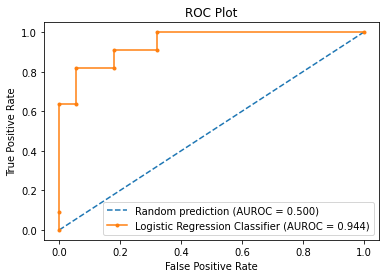

In [88]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression Classifier (AUROC = %0.3f)' % lr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()